# Aula 5 - Exercícios - Gráficos
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [15]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor


### 5.2 Plote um gráfico que mostre a evolução ao longo do tempo dos dados de curetagem do Estado de São Paulo.


#### Dica: Inspire-se no exercício quase igual a esse resolvido durante a aula 5. O que você precisa fazer a mais é filtrar os dados do Estado de São Paulo.
#### path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'


In [16]:
# YOUR CODE HERE
path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'
df_curetagem = pd.read_excel(path_curetagem, na_values='-')
df_curetagem.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)
del df_curetagem['Total']

df_curetagem = df_curetagem[df_curetagem["uf"] == "35 São Paulo"]
df_unpivoted = df_curetagem.melt(id_vars=['uf'], var_name='data', value_name='qtd')


In [17]:
from datetime import datetime
import locale
# Configure o locale para 'pt_BR.UTF-8'
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do mês (de 1 a 12)
df_unpivoted['mes'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').month)
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do ano
df_unpivoted['ano'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').year)
# Crie uma coluna no dataframe df_unpivoted para guardar a data (em formato datetime)
df_unpivoted['data'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b'))
# Converta a coluna qtd para float
df_unpivoted['qtd'] = df_unpivoted['qtd'].astype(float)

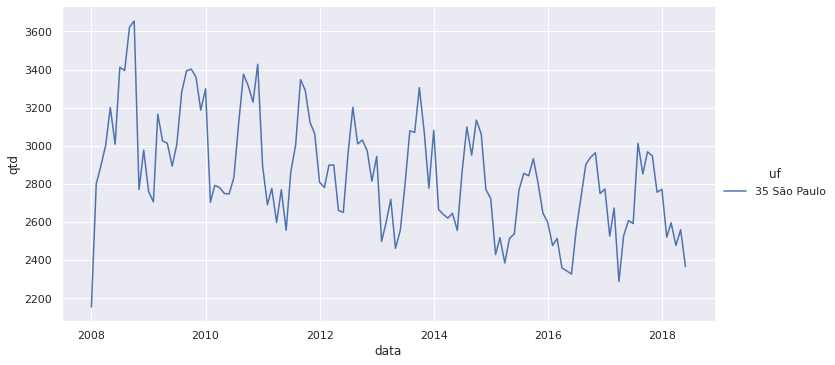

In [19]:
# Plote um gráfico de linha com a data no eixo x, a variavel qtd no eixo y e desagregando o dado pelas as UFs 
# e representando-as por cores distintas. Use um aspect=2 para deixar o gráfico mais alongado horizontalmente.
g = sns.relplot(
    x="data", 
    y="qtd", 
    hue="uf", 
    aspect=2, 
    kind="line", 
    data=df_unpivoted
)

# Pergunta: esse gráfico é periódico?
# Resposta: sim, o gráfico é periódico porque a funçção retorna valores que se repetem ao longo do tempo.